# Lecture 3 - Introduction to Neural Networks with Scikit-Learn
#### Quantum Data Science 23/24


### Table of Contents

1. [Shallow Neural Networks](#shallow_neural_networks)
    - [Perceptron](#perceptron)
    - [Multi-Layer Perceptron](#multi_layer_perceptron)
    - [Gradient-based learning](#gradient_based_learning)
    - [Interactive Demo: Gradient Descent](#interactive_demo_gradient_descent)
    - [Activation Functions](#activation_functions)
2. [Deep Neural Networks](#deep_neural_networks)
    - [MLPs with multiple layers](#hidden_layers)
    - [Backpropagation](#backpropagation)
    - [Neural network playground](#neural_network_playground)
3. [Simple Neural Network regressor with Scikit-learn](#building_nn)
    - [Sklearn overview](#sklearn_overview)
    - [Datasets](#dataset_overview)
    - [MLPs in sklearn](#mlp_sklearn)
    - [Model selection and evaluation](#model_selection_and_evaluation)
4. [Hands-On Exercise : MLP classifier for Iris dataset](#hands_on_exercise)

5. [Homework](#homework)
   
6. [References](#references)




<a id='shallow_neural_networks'></a>
##  1. Shallow Neural Networks   

### 1.1 Perceptron <a id='perceptron'></a>

<img title="a title" alt="Alt text" src="images/neuron_vs_perceptron.png">

The perceptron is the artificial realization of a biological neuron. It takes a set of inputs, multiplies them by a set of weights, and then passes them through an *heaviside step function*. 

$$
\begin{equation}
    \hat{y} = \begin{cases}
        1 & \text{if } \sum_{i=1}^{n} w_i x_i + b \geq 0 \\
        0 & \text{otherwise}    
    \end{cases}
\end{equation}
$$

### 1.2 Multi Layer Perceptron <a id='mlp'></a>
The single perceptron is a linear classifier, which means that it can only classify linearly separable data. Marvin Minsky and Seymour Papert showed in 1969 that a single perceptron cannot learn an XOR function.

<img title="a title" alt="Alt text" src="images/xor_problem.png">

However, a single perceptron can learn the AND and OR functions. Therefore, it is possible to combine multiple perceptrons to create a multi-layer perceptron (MLP) (illustrated in Figure 13.1 (b) ) that can learn non-linear functions. 

Image source: [Probabilistic Machine Learning: An Introduction, Kevin P. Murphy](https://probml.github.io/pml-book/book1.html)

### 1.3 Gradient-based learning <a id='gradient_based_learning'></a>

Goal: Learn optimal weights $\theta$ and bias $b$ for a given task. For instance, minimizing the error of our prediction.

In a supervised scenario, for instance, a classification task, let $y$ be the true label and $\hat{y}$ the predicted label coming from our model. We can define the error (*loss*) as the difference between the true label and the predicted label:

$$
\begin{equation}
    L(\theta) = (y - \hat{y})^2
\end{equation}
$$

Suppose a training set of $M$ samples, we can define the *least squares cost function* as the average loss over all samples:

$$
\begin{equation}
    C(\theta) = \frac{1}{M} \sum_{i=1}^{M} L(\theta)
\end{equation}
$$

Now we minimize the cost function $C(\theta)$ with respect to the weights $\theta$ and bias $b$ using standard *gradient descent*.


### 1.4 Interactive demo on gradient descent <a id='interactive_demo_gradient_descent'></a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox

# Define the loss function and its derivative
def loss_function(x):
    return x ** 2

def derivative(x):
    return 2 * x

# Gradient descent function
def gradient_descent(starting_point, learning_rate, num_steps=10):
    x = starting_point
    path = [x]
    for _ in range(num_steps):
        grad = derivative(x)
        x = x - learning_rate * grad
        path.append(x)
    return np.array(path)

# Function to plot tangent line
def plot_tangent_line(ax, x, y, grad):
    tangent_line_x = np.array([x - 1, x + 1])
    tangent_line_y = y + grad * (tangent_line_x - x)
    ax.plot(tangent_line_x, tangent_line_y, color='purple')

# Interactive plot function
def plot_gradient_descent(starting_point, learning_rate, show_tangent_only):
    path = gradient_descent(starting_point, learning_rate)
    x_values = np.linspace(-10, 10, 400)
    y_values = loss_function(x_values)

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Loss Function', color='darkblue')
    
    if show_tangent_only:
        initial_grad = derivative(starting_point)
        plot_tangent_line(plt, starting_point, loss_function(starting_point), initial_grad)
        plt.scatter(starting_point, loss_function(starting_point), color='purple', label='Starting Point')
    else:
        plt.scatter(path, loss_function(path), color='purple', label='Gradient Descent Path')
        plt.plot(path, loss_function(path), color='purple', linestyle='dashed')
    
    plt.title(f"Gradient Descent: Learning Rate {learning_rate}, Starting Point {starting_point}")
    plt.xlabel("Parameter Value")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive controls
interact(plot_gradient_descent, 
         starting_point=FloatSlider(value=0, min=-10, max=10, step=0.1, description='Starting Point:'),
         learning_rate=FloatSlider(value=0, min=0.0, max=1.0, step=0.01, description='Learning Rate:'),
         show_tangent_only=Checkbox(value=False, description='Show Only Tangent Line'))


interactive(children=(FloatSlider(value=0.0, description='Starting Point:', max=10.0, min=-10.0), FloatSlider(…

<function __main__.plot_gradient_descent(starting_point, learning_rate, show_tangent_only)>

What is the problem with the heavi-side step function? 



It is not differentiable. Therefore, we cannot use gradient descent to optimize the weights and bias.

### 1.5 Activation Functions <a id='activation_functions'></a>



There are several activation functions , and their use depends on the type of problem you are trying to solve.  The most common activation functions are:
- *Sigmoid function*:
$$

    \sigma(x) = \frac{1}{1 + e^{-x}}

$$
- *Hyperbolical tangent function*:
$$
    
        \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}
$$
- *Rectified Linear Unit (ReLU)*:
$$
    
        \text{ReLU}(x) = \max(0, x)
$$
- *Gaussian Error Linear Unit (GELU)*:
$$
    
        \text{GELU}(x) = x \cdot \Phi(x)
$$

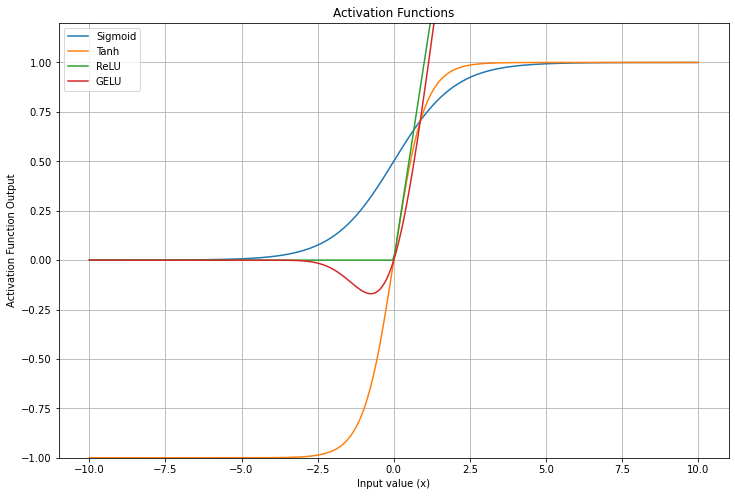

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Defining the activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def gelu(x):
    # Using the approximation of GELU
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

def tanh(x):
    return np.tanh(x)

# Generate a range of values
x = np.linspace(-10, 10, 300)

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, tanh(x), label='Tanh')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, gelu(x), label='GELU')

plt.title('Activation Functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation Function Output')
#truncate y axis to zoom in on the plot
plt.ylim([-1, 1.2])
plt.legend()
plt.grid(True)
plt.show()



- *Sigmoid function*
  - Characteristics: Smooth gradient, output values between 0 and 1. Vanishing gradient problem since the gradient is close to zero for large positive and negative inputs.
  - Common Use Cases: Used in binary classification problems and models where probabilities are required.

- *Hyperbolic Tangent (tanh) Function*:
  - Characteristics: Similar to sigmoid but outputs values between -1 and 1.
  - Common Use Cases: Often used in hidden layers of a neural network.

- *Rectified Linear Unit (ReLU)*:
  - Characteristics: Efficient and simple, output is zero when input is negative.
  - Common Use Cases: Widely used in most types of neural networks.

- *Gaussian Error Linear Unit (GELU)*:
  - Characteristics: Non-monotonic, provides a smoother curve than ReLU.
  - Common Use Cases: Effective in transformer models and deep learning architectures such as BERT or GPT-3.

<a id='deep_neural_networks'></a>
##  2. Deep Neural Networks   

### 2.1 MLPs with multiple layers <a id='hidden_layers'></a>

Deep Neural networks are neural networks with multiple hidden layers. The hidden layers are the layers between the input and output layers.

<img title="a title" alt="Alt text" src="images/deep_neural_network.png">

The motivation comes from the *universal approximation theorem*: "The approximation properties of two-layer feed-forward networks were widely studied in the 1980s, with various theorems showing that, for a wide range of activation functions, such networks can approximate any function defined over a continuous subset of $\mathbb{R}^N$ to arbitrary accuracy. A similar result holds for functions from any finite-dimensional discrete space to any another. Neural networks are therefore said to be *universal approximators*." - [Deep Learning: Foundations and concepts, Christopher M. Bishop](https://en.wikipedia.org/wiki/Universal_approximation_theorem)

### 2.2 Backpropagation <a id='backpropagation'></a>


MLP's are efficiently trained using the *backpropagation* algorithm. Backpropagation is one of the main responsibles for the success and scalability of neural networks!

Let us assume the computation graph is a simple chain. In this case, backpropagation is equivalent to repeated applications of the chain rule of calculus. The method can be further generalized to arbitrary directed acyclic graphs (DAGs). This general procedure is often called automatic differentiation.

<img title="a title" alt="Alt text" src="images/backprop.png">



### 2.3 Neural Network playground <a id='neural_network_playground'></a>


You can use this website to visualize small networks in action: https://playground.tensorflow.org/

<img title="a title" alt="Alt text" src="images/neural_network_visualization.png">



## 3. Scikit-learn introduction <a id='sklearn_intro'></a>

### 3.1 Overview <a id='sklearn_overview'></a>

Scikit-learn is a Python library for machine learning. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means... 
It is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. Website: [Sklearn](https://scikit-learn.org/stable/index.html)

Installing scikit-learn: Follow the instructions for your operating system: [installation instructions](https://scikit-learn.org/stable/install.html)


Loose yourself in the [user guide](https://scikit-learn.org/stable/user_guide.html)

In [2]:
#import sklearn
import numpy as np
import sklearn

### 3.2 Data preprocessing <a id='data_preprocessing'></a>
*Standardization* of datasets is a common requirement for many machine learning estimators. They might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

*Normalization* is the process of scaling individual samples to have unit norm. 

check the [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module.

```python
from sklearn import preprocessing

In [5]:
from sklearn import preprocessing

#random dataset of 4 features and 10 samples
n_features = 4
n_samples = 10
X_train = np.random.rand(n_samples, n_features)

#scaler
scaler = preprocessing.StandardScaler().fit(X_train)

#apply transformation to data
X_scaled = scaler.transform(X_train)

print("original data: \n",X_train)
print("trasnformed data: \n", X_scaled)

#mean and variance of original data
print("mean of original data: \n", X_train.mean(axis=0))
print("variance of original data: \n", X_train.var(axis=0))

#mean and variance of transformed data
print("mean of transformed data: \n", X_scaled.mean(axis=0))
print("variance of transformed data: \n", X_scaled.var(axis=0))

original data: 
 [[0.11225215 0.29813684 0.23836323 0.94690446]
 [0.00535524 0.21629515 0.82088381 0.28638381]
 [0.89607219 0.20528652 0.84157539 0.95232764]
 [0.6638018  0.13944958 0.03585917 0.36428801]
 [0.40593906 0.89517098 0.53945412 0.52125251]
 [0.23223125 0.7559975  0.18454211 0.62417802]
 [0.64208035 0.61292171 0.75977667 0.66673735]
 [0.54478461 0.05130011 0.05391845 0.75693341]
 [0.95189801 0.06845214 0.66919227 0.85593146]
 [0.39332908 0.50277069 0.96418209 0.1056092 ]]
trasnformed data: 
 [[-1.24538649 -0.26978864 -0.81617646  1.24267243]
 [-1.6027557  -0.55863724  0.92912277 -1.17967112]
 [ 1.37501795 -0.59749064  0.99111715  1.262561  ]
 [ 0.59851017 -0.82985276 -1.42290211 -0.89397111]
 [-0.26355591  1.8373585   0.08592678 -0.31833136]
 [-0.84428195  1.34616548 -0.97743078  0.05912987]
 [ 0.52589275  0.84119979  0.74603869  0.21520872]
 [ 0.20062141 -1.14096379 -1.36879443  0.54598694]
 [ 1.56165036 -1.08042815  0.47463733  0.9090449 ]
 [-0.30571259  0.45243746  1.3584

Alternatively, you can scale features in a given range [a,b] using the MinMaxScaler:

```python
from sklearn.preprocessing import MinMaxScaler


In [8]:
#random dataset of 4 features and 10 samples
n_features = 4
n_samples = 10
X_train = np.random.rand(n_samples, n_features)

#scaler
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

#apply transformation to data
X_train_minmax = min_max_scaler.fit_transform(X_train)

print("original data: \n",X_train)
print("trasnformed data: \n", X_train_minmax)

original data: 
 [[0.58148623 0.4561312  0.06281271 0.51324215]
 [0.1989165  0.3797083  0.09847171 0.15467541]
 [0.90569144 0.09308921 0.1529186  0.81191041]
 [0.51728816 0.62707886 0.33892491 0.41309734]
 [0.62651624 0.08947567 0.64773504 0.30764438]
 [0.48060529 0.51322155 0.82397198 0.85331273]
 [0.48353039 0.22466495 0.60574824 0.89750607]
 [0.62920835 0.82206099 0.04519121 0.53234268]
 [0.3180721  0.55581015 0.68180548 0.95144873]
 [0.95847713 0.9555326  0.29844434 0.75329707]]
trasnformed data: 
 [[0.5036724  0.42336193 0.02262704 0.45002352]
 [0.         0.33511958 0.06841528 0.        ]
 [0.93050497 0.00417241 0.13832827 0.82487075]
 [0.4191524  0.6207481  0.37717123 0.32433557]
 [0.5629567  0.         0.77370148 0.19198555]
 [0.37085754 0.48928179 1.         0.87683322]
 [0.37470858 0.15609745 0.71978796 0.93229861]
 [0.56650099 0.84588587 0.         0.47399588]
 [0.15687437 0.53845707 0.81744991 1.        ]
 [1.         1.         0.32519182 0.75130736]]


The function **normalize** provides a quick and easy way to perform this operation on a single array-like dataset, either using the l1, l2, or max norms

In [13]:
n_features = 4
n_samples = 100
X_train = np.random.uniform(low=-np.pi, high=np.pi, size=(n_samples, n_features))

X_normalized = preprocessing.normalize(X_train, norm='l2')

print("original data: \n",X_train)
print("trasnformed data: \n", X_normalized)

original data: 
 [[ 1.90868503  2.66878134 -0.57110765  0.86298683]
 [ 2.30478971  0.15236036 -0.9910287   2.14633325]
 [ 0.84195874  0.05023406 -2.00695383 -3.02143438]
 [ 1.40132169  1.27167487  2.43612366 -0.1484076 ]
 [ 1.47420437  2.84651466  2.3380975  -1.99779208]
 [ 1.76128945  1.5771476   3.01290034 -1.21427866]
 [-1.12404814  1.21893559 -1.6504425   1.57941341]
 [ 2.21550318 -3.12170207  0.43846183 -1.30449841]
 [-3.04551879 -1.48805156 -2.1010544  -0.44633715]
 [ 1.47724961 -0.04710816 -2.68950567 -0.44025956]
 [ 3.07700436  1.57296414  0.89377057 -0.86953478]
 [-2.27927204  1.86375174  0.71269452  0.08853915]
 [ 2.23508412 -0.65755867  2.84846868  0.97534247]
 [ 2.86469138 -1.41005212  1.34541179 -2.94053196]
 [-0.91543707  0.01054119 -0.58201865 -1.13834702]
 [-1.15212192  2.45666358  2.36830631  0.3196577 ]
 [ 0.81996345  0.03150381  2.08756388 -2.16669936]
 [ 1.74368551  1.26790812 -1.40492239  2.12023691]
 [ 1.80624906  1.04836492  2.44396689 -0.40043915]
 [-0.89460886 

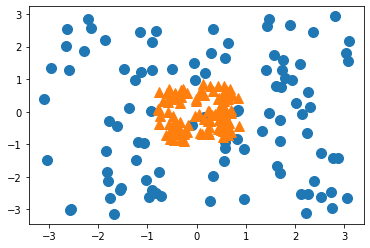

In [14]:
import matplotlib.pyplot as plt

plt.plot(X_train[:,0], X_train[:,1], 'o', label='Original data', markersize=10)
plt.plot(X_normalized[:,0], X_normalized[:,1], '^', label='Normalized data', markersize=10)

### 3.3 Datasets  <a id='datasets'></a>


Scikit-learn provides a set of small standard datasets that are useful for quickly demonstrating the behavior of the various algorithms implemented in the library. They are documented in the Datasets section [Sklearn datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)

You can even make you artificial datasets using the make_* functions [make random datasets sklearn](https://scikit-learn.org/stable/modules/classes.html#samples-generator)


In [16]:
from sklearn.datasets import make_classification

n_features = 4
n_samples = 100
n_classes = 2

#make classification dataset acn be used to generate a random dataset for classification problem with n_classes [0,1,..,n_classes-1]

X, y = make_classification(n_features=n_features, n_samples=n_samples, n_classes=n_classes)

print("X: ", X)
print("y: ", y)

X:  [[-0.25491451 -0.29751544  0.35568067 -0.89177874]
 [ 0.50752216  0.75279448 -0.67335583 -0.32885298]
 [ 0.42690471  0.62789176 -0.56755096 -0.20678075]
 [ 0.66449425  1.04865513 -0.86795439 -1.25716079]
 [ 0.89821962  1.35766586 -1.1862163  -0.9145978 ]
 [-0.79334814 -1.18075855  1.05170746  0.56659116]
 [-0.59737958 -0.93445385  0.78208639  1.0215184 ]
 [ 1.02749846  1.51958519 -1.36420576 -0.60706516]
 [-0.49496531 -0.86614234  0.62808434  2.05151108]
 [ 1.36978281  1.83703128 -1.85957932  1.66630153]
 [ 0.36184805  0.49608262 -0.4888926   0.29848486]
 [ 0.50544418  0.69720281 -0.68198289  0.36114198]
 [ 0.15721461  0.09831767 -0.23782548  1.66697962]
 [ 0.49766037  0.66255687 -0.67666386  0.66914175]
 [ 0.96230705  1.30462028 -1.30335341  0.98623378]
 [-0.72886578 -1.08743714  0.96565163  0.55528271]
 [-0.22378872 -0.32674363  0.29803861  0.07685635]
 [ 0.6368057   1.03303876 -0.82570029 -1.57303407]
 [-0.92654555 -1.24860999  1.25654985 -1.04830646]
 [ 0.64758136  0.91050668 -

Recall that data should be split into training and test sets. 

Sklearn provides a [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to do this.

In [17]:
from sklearn.model_selection import train_test_split

# 0.7 / 0.3 train-test random split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (70, 4)
X_test shape:  (30, 4)
y_train shape:  (70,)
y_test shape:  (30,)


### 3.4 MLPs in sklearn <a id="mlp_sklearn"></a>

Sklearn provides Multi-layer Perceptrons for classification and regression tasks. 

*Classification* - Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation. You can define number of layers, number of neurons per layer, activation function, solver, learning rate, regularization, etc. [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier). The cost-function, however, is the *cross-entropy loss function*. For n_classes=2 :

$$
\begin{equation}
    C(\theta) = - \frac{1}{M} \sum_{i=1}^{M} \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
\end{equation}
$$

where $y_i$ is the true label and $\hat{y}_i$ the predicted label for sample $i$.

It supports multi-class classification by applying Softmax as the output function.

*Regression* - Class MLPRegressor implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values. [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

In [19]:
#Classifier for the randomly generated dataset

from sklearn.neural_network import MLPClassifier

n_features = 4
n_samples = 100
n_classes = 2

#make classification dataset 
X, y = make_classification(n_features=n_features, n_samples=n_samples, n_classes=n_classes)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)

'''
Number of Hidden Layers: The length of the tuple defines the number of hidden layers. For example, hidden_layer_sizes=(100, 50, 30) means there are three hidden layers with 100, 50, and 30 neurons, respectively.
'''
hidden_layer_sizes = (10,10)

clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation='relu', max_iter=100)

clf = clf.fit(X, y)

/opt/homebrew/Caskroom/miniforge/base/envs/quantum_DS/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### 3.5 Model selection and evaluation <a id="model_selection_and_evaluation"></a>

We trained the model but there is much more we need to do to guarantee that the model is effectively good and that it will generalize well to unseen data. 

We need to evaluate the model and select the best one.

*Cross-validation* - Split data in several folds and train the model on each fold. This is a way to use all the data for training and testing. [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)

*Grid search* - Notice that we didn't select the best hyperparameters. We could actually be starting optimization in worst possible point of the training ladscape. Hyperparameter tuning can be started with some sorte of [*Grid search*](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV). You can also use software like [Optuna](https://optuna.org/) to do this automatically for you.

- *Evaluation metrics* - We need to evaluate the model on unseen data. Most common metrics are 
    - *accuracy* - number of correct predictions divided by the total number of predictions.
    - *precision* - The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
    - *recall* - The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
    - *F1-score* - The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
    
Check the [Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics) module for more information.

In [22]:
#accuracy, precision, recall, f1-score in sklearn for the classifier:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#predict on train set
y_pred_train = clf.predict(X_train)

#predict on test set
y_pred_test = clf.predict(X_test)

#accuracy train
print("accuracy train: ", accuracy_score(y_train, y_pred_train))

#accuracy test
print("accuracy test: ", accuracy_score(y_test, y_pred_test))

#precision
print("precision: ", precision_score(y_test, y_pred_test))

#recall
print("recall: ", recall_score(y_test, y_pred_test))

#f1-score
print("f1-score: ", f1_score(y_test, y_pred_test))


accuracy train:  0.9142857142857143
accuracy test:  0.8333333333333334
precision:  0.8
recall:  0.8571428571428571
f1-score:  0.8275862068965518


## 4. Hands-On Exercise : MLP classifier for Iris dataset <a id='hands_on_exercise'></a>

In this exercise, we will use the MLPClassifier to classify the Iris dataset. The Iris dataset is a classic dataset of plants with 3 classes. 

Load the dataset, split it into training and test sets, and train the MLPClassifier. 

Verify the accuracy of the model on the test set.

## 5. Homework <a id='homework'></a>

- Explore the MLPRegressor and try to fit a model to the Boston dataset.
- Play around with the MLPClassifier for the Iris dataset. Try to improve the accuracy of the model by changing the hyperparameters.
- Use [visualization tools](https://scikit-learn.org/stable/visualizations.html) from sklearn to visualize the decision boundary and the confusion matrix associated with the MLPClassifier.

## 6. References <a id='references'></a>

- [Probabilistic Machine Learning: An Introduction, Kevin P. Murphy](https://probml.github.io/pml-book/book1.html)
- [Deep Learning: Foundations and concepts, Christopher M. Bishop](https://www.microsoft.com/en-us/research/people/cmbishop/#!prml-book)
- [Scikit-learn](https://scikit-learn.org/stable/index.html)